# Simple Linear and Multiple Regression

## Linear Regression

### Step 1: Import Relevant Packages

In [6]:
import numpy as np #Multi-dimensional arrays
import pandas as pd #organize data in tabular form
import scipy #Python ecosystem for data science
import statsmodels.api as sm #numpy and scipy 
import matplotlib.pyplot as plt #visualization
import seaborn as sns #Based on matplotlib for visualization

### Step 2: Load the data


In [2]:
data = pd.read_csv('Simple linear regression.csv')
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [3]:
# Describe data to see quick summary
# Percentiles 25,50,75 shows the values at that percent
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


### Step 3: Create First Regression

In [4]:
# Define Dependent (GPA) and Independent (SAT) Variable
y = data['GPA']
x1 = data['SAT']

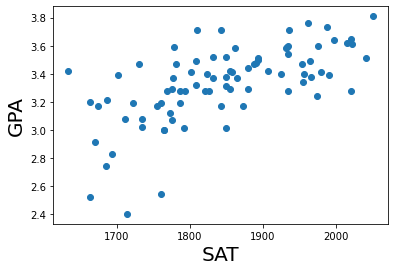

In [7]:
# Show quick scatter plot
plt.scatter(x1, y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

In [9]:
# Build regression fitting
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit() # Fit will apply a specific estimation technique (OLS in this case) to obtain the fit of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 27 May 2021   Prob (F-statistic):           7.20e-11
Time:                        13:58:00   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 4: Build Regression Plot

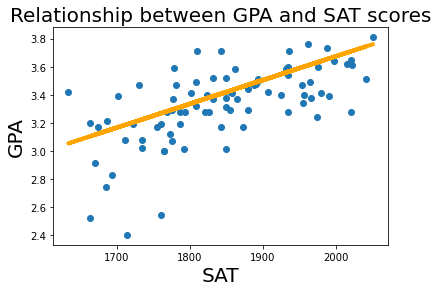

In [15]:
# Build regression line
plt.scatter(x1,y)        # Original data
yhat = 0.0017*x1 + 0.275 # coef column from results.summary()
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression line') # Add regression line
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.title('Relationship between GPA and SAT scores', fontsize=20)
plt.show()

#### Important Notes
* y = b0 + b1*x
* b0 = const_coeff = 0.2750
* b1 = SAT__coeff = 0.0017

* std_err shows the accuracy of the prediction. Lower std_err is better

#### T-statistic and P value
* P value should be less than 0.05

#### Conclusion
*We can therefore conclude that the GPA is dependent to the SAT Score*

## Multiple Regression

### Step 1: Import Relevant Packages

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()

### Step 2: Load the data

In [19]:
data = pd.read_csv('Multiple linear regression.csv')
data

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [20]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


### Step 3: Creating the Regression

In [21]:
# Define dependent (GPA) and independent variables (SAT and Rand 1,2,3)
y = data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']]

In [22]:
# Create fitting
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Thu, 27 May 2021   Prob (F-statistic):           6.58e-10
Time:                        14:23:25   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P Value of `Rand 1,2,3` is 0.762. As a rule, P value should be less than 0.05 to deem the variable as useful in the regression. In this case, we need to remove the Rand 1,2,3 in the regression

Also adjusted R squared is less meaning that the regression has worsened.